sex, class, age, survived, cabin, fare ..... these are features!

A feature is just a piece of information about something
In Machine Learning (ML), the computer learns from these features to make predictions.

But before it can learn, we need to clean and shape those features so the computer 
doesn't get confused.

### What is feature engineering?

Feature engineering is the process of cleaning, fixing, and improving data so that
a computer can understand it.


In [15]:
import pandas as pd
import seaborn as sns

from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load data
df = sns.load_dataset("titanic").copy()
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
num_vars = ["age", "fare"]
cat_vars = ["sex", "embarked"]

pipe = Pipeline([
    # 1) Impute numerics
    ("num_imputer", MeanMedianImputer(imputation_method="median", variables=num_vars)),
    # 2) Impute categoricals (embarked has NaNs)
    ("cat_imputer", CategoricalImputer(imputation_method="frequent", variables=cat_vars)),
    # 3) One-hot encode categoricals
    ("encoder", OneHotEncoder(variables=cat_vars, drop_last=True)),
    # 4) Scale numerics (wrap sklearn scaler to preserve DataFrame)
    ("scaler", SklearnTransformerWrapper(
        transformer=StandardScaler(),
        variables=num_vars
    )),
])

df_transformed = pipe.fit_transform(df)
df_transformed.head()


,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_S,embarked_C
0,0,3,-0.565736,1,0,-0.502445,Third,man,True,NaN,Southampton,no,False,1,1,0
1,1,1,0.663861,1,0,0.786845,First,woman,False,C,Cherbourg,yes,False,0,0,1
2,1,3,-0.258337,0,0,-0.488854,Third,woman,False,NaN,Southampton,yes,True,0,1,0
3,1,1,0.433312,1,0,0.420730,First,woman,False,C,Southampton,yes,False,0,1,0
4,0,3,0.433312,0,0,-0.486337,Third,man,True,NaN,Southampton,no,True,1,1,0


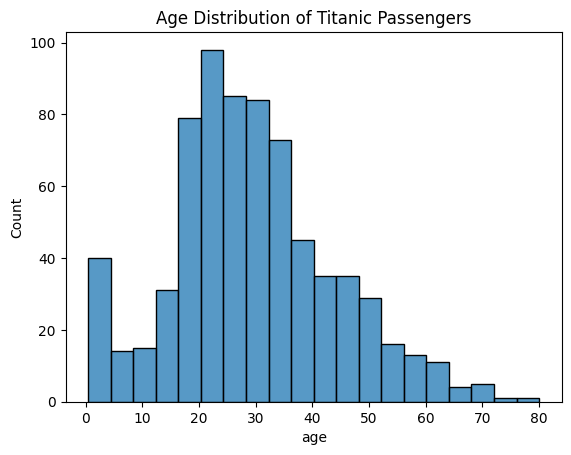

In [17]:
import matplotlib.pyplot as plt

sns.histplot(df['age'], bins=20)
plt.title("Age Distribution of Titanic Passengers")
plt.show()